

---
***APPLICATION IN ELECTRONICS***

---




**`CMOS Amplifier Optimization`**

In [ ]:
import numpy as np
NUM_ANTS = 30
NUM_ITERATIONS = 300
ALPHA = 1.0
BETA = 2.0
RHO = 0.1
Q0 = 0.7
PHEROMONE_MIN = 0.01
PHEROMONE_MAX = 1.0
NUM_SENSORS = 15
NUM_TRANSISTORS = 25
MAX_SENSOR_VALUE = 10
MAX_POWER_CONSUMPTION = 100.0
TARGET_DELAY = 50.0
def evaluate_solution(solution, power_consumption, delay):
    total_sensor_product = np.prod(solution)
    total_power_consumption = np.sum(power_consumption)
    total_delay = np.sum(delay)
    power_penalty = max(0.0, total_power_consumption - MAX_POWER_CONSUMPTION)
    delay_penalty = max(0.0, total_delay - TARGET_DELAY)
    objective = total_sensor_product - 0.5 * power_penalty - 0.5 * delay_penalty
    return objective
def update_pheromones(pheromones, delta_pheromones, ant, solution, solution_quality):
    evaporation = RHO
    for i in range(NUM_TRANSISTORS):
        sensor = solution[i]
        delta_pheromones[sensor][i] += (1.0 - evaporation) * (Q0 / solution_quality)
    pheromones = np.clip(pheromones * evaporation + delta_pheromones, PHEROMONE_MIN, PHEROMONE_MAX)
    return pheromones
def ant_colony_optimization(pheromones, power_consumption, delay):
    best_objective = -1e9
    for iteration in range(NUM_ITERATIONS):
        delta_pheromones = np.zeros((NUM_SENSORS, NUM_TRANSISTORS))
        best_iteration_objective = -1e9
        for ant in range(NUM_ANTS):
            ant_solution = np.zeros(NUM_TRANSISTORS, dtype=int)
            for i in range(NUM_TRANSISTORS):
                rand_value = np.random.rand()
                if rand_value < Q0:
                    best_sensor = np.argmax(pheromones[:, i])
                    ant_solution[i] = best_sensor
                else:
                    total_probability = np.sum(np.power(pheromones[:, i], ALPHA) * np.power(1.0 / (np.arange(NUM_SENSORS) + 1), BETA))
                    random_value = np.random.rand()
                    cumulative_probability = 0.0
                    selected_sensor = 0
                    for s in range(NUM_SENSORS):
                        cumulative_probability += (np.power(pheromones[s, i], ALPHA) * np.power(1.0 / (s + 1), BETA)) / total_probability
                        if random_value <= cumulative_probability:
                            selected_sensor = s
                            break
                    ant_solution[i] = selected_sensor
            solution_quality = evaluate_solution(ant_solution, power_consumption, delay)
            pheromones = update_pheromones(pheromones, delta_pheromones, ant, ant_solution, solution_quality)
            if solution_quality > best_iteration_objective:
                best_iteration_objective = solution_quality
        if best_iteration_objective > best_objective:
            best_objective = best_iteration_objective
            print(f"Iteration {iteration + 1}: Best Objective = {best_objective:.2f}")
pheromones = np.ones((NUM_SENSORS, NUM_TRANSISTORS))
power_consumption = np.array([15.0, 12.0, 18.0, 10.0, 20.0, 14.0, 16.0, 22.0, 25.0, 30.0, 8.0, 17.0, 19.0, 21.0, 24.0, 13.0, 11.0, 23.0, 28.0, 26.0, 9.0, 27.0, 7.0, 29.0, 31.0])
delay = np.array([45.0, 48.0, 42.0, 50.0, 40.0, 46.0, 44.0, 38.0, 35.0, 30.0, 52.0, 43.0, 41.0, 39.0, 36.0, 47.0, 49.0, 37.0, 32.0, 34.0, 51.0, 33.0, 53.0, 31.0, 29.0])
ant_colony_optimization(pheromones, power_consumption, delay)

Iteration 1: Best Objective = -675.00


In [ ]:
import numpy as np
NUM_ANTS = 30
NUM_ITERATIONS = 300
ALPHA = 1.0
BETA = 2.0
RHO = 0.1
MIN_Q0 = 0.1
MAX_Q0 = 0.9
PHEROMONE_MIN = 0.01
PHEROMONE_MAX = 1.0
NUM_SENSORS = 15
NUM_TRANSISTORS = 25
MAX_SENSOR_VALUE = 10
MAX_POWER_CONSUMPTION = 100.0
TARGET_DELAY = 50.0
def evaluate_solution(solution, power_consumption, delay):
    total_sensor_product = np.prod(solution)
    total_power_consumption = np.sum(power_consumption)
    total_delay = np.sum(delay)
    power_penalty = max(0.0, total_power_consumption - MAX_POWER_CONSUMPTION)
    delay_penalty = max(0.0, total_delay - TARGET_DELAY)
    objective = total_sensor_product - 0.5 * power_penalty - 0.5 * delay_penalty
    return objective
def update_pheromones(pheromones, delta_pheromones, ant, solution, solution_quality, local_update=True):
    evaporation = RHO
    q0 = MIN_Q0 + (MAX_Q0 - MIN_Q0) * (NUM_ITERATIONS - ant) / NUM_ITERATIONS
    for i in range(NUM_TRANSISTORS):
        sensor = solution[i]
        delta_pheromones[sensor][i] += (1.0 - evaporation) * (q0 / solution_quality)
        if local_update:
            pheromones[sensor][i] = np.clip(pheromones[sensor][i] * (1.0 - evaporation) + delta_pheromones[sensor][i], PHEROMONE_MIN, PHEROMONE_MAX)
    pheromones = np.clip(pheromones * evaporation + delta_pheromones, PHEROMONE_MIN, PHEROMONE_MAX)
    return pheromones
def ant_colony_optimization(pheromones, power_consumption, delay):
    best_objective = -1e9
    best_solution = None
    convergence_curve = []
    for iteration in range(NUM_ITERATIONS):
        delta_pheromones = np.zeros((NUM_SENSORS, NUM_TRANSISTORS))
        best_iteration_objective = -1e9
        best_iteration_solution = None
        for ant in range(NUM_ANTS):
            ant_solution = np.zeros(NUM_TRANSISTORS, dtype=int)
            for i in range(NUM_TRANSISTORS):
                rand_value = np.random.rand()
                if rand_value < q0:
                    best_sensor = np.argmax(pheromones[:, i])
                    ant_solution[i] = best_sensor
                else:
                    total_probability = np.sum(np.power(pheromones[:, i], ALPHA) * np.power(1.0 / (np.arange(NUM_SENSORS) + 1), BETA))
                    random_value = np.random.rand()
                    cumulative_probability = 0.0
                    selected_sensor = 0
                    for s in range(NUM_SENSORS):
                        cumulative_probability += (np.power(pheromones[s, i], ALPHA) * np.power(1.0 / (s + 1), BETA)) / total_probability
                        if random_value <= cumulative_probability:
                            selected_sensor = s
                            break
                    ant_solution[i] = selected_sensor
            solution_quality = evaluate_solution(ant_solution, power_consumption, delay)
            pheromones = update_pheromones(pheromones, delta_pheromones, ant, ant_solution, solution_quality)
            if solution_quality > best_iteration_objective:
                best_iteration_objective = solution_quality
                best_iteration_solution = ant_solution
        convergence_curve.append(best_iteration_objective)
        if best_iteration_objective > best_objective:
            best_objective = best_iteration_objective
            best_solution = best_iteration_solution
            print(f"Best Objective = {best_objective:.2f}")
            print("Best Solution (Sensor Choices) =", best_solution)
            print("Power Consumption =", np.sum(power_consumption))
            print("Delay =", np.sum(delay))
            print("\n")
pheromones = np.random.rand(NUM_SENSORS, NUM_TRANSISTORS)
power_consumption = np.array([15.0, 12.0, 18.0, 10.0, 20.0, 14.0, 16.0, 22.0, 25.0, 30.0, 8.0, 17.0, 19.0, 21.0, 24.0, 13.0, 11.0, 23.0, 28.0, 26.0, 9.0, 27.0, 7.0, 29.0, 31.0])
delay = np.array([45.0, 48.0, 42.0, 50.0, 40.0, 46.0, 44.0, 38.0, 35.0, 30.0, 52.0, 43.0, 41.0, 39.0, 36.0, 47.0, 49.0, 37.0, 32.0, 34.0, 51.0, 33.0, 53.0, 31.0, 29.0])
ant_colony_optimization(pheromones, power_consumption, delay)

Best Objective = -675.00
Best Solution (Sensor Choices) = [ 1  3 12  3  3  7  2  0  6 14 10  3  2 14  9  5  1  5  6 12  1  5  7 10
 13]
Power Consumption = 475.0
Delay = 1025.0




In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 33 not upgraded.
Need to get 2,433 kB of archives.
After this operation, 7,694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2 [2,037 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgail18 amd64 2.24.33-2ubuntu2 [15.9 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64

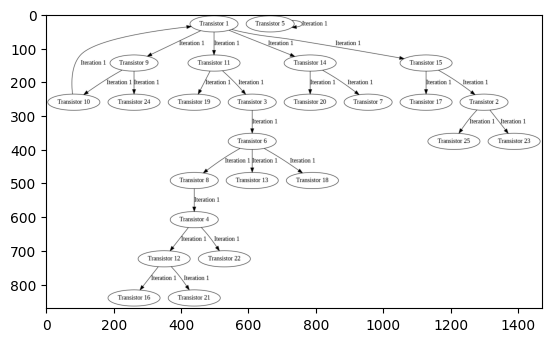

In [ ]:
import numpy as np
import pygraphviz as pgv
import matplotlib.pyplot as plt
NUM_ANTS = 30
NUM_ITERATIONS = 300
ALPHA = 1.0
BETA = 2.0
RHO = 0.1
MIN_Q0 = 0.1
MAX_Q0 = 0.9
PHEROMONE_MIN = 0.01
PHEROMONE_MAX = 1.0
NUM_SENSORS = 15
NUM_TRANSISTORS = 25
MAX_SENSOR_VALUE = 10
MAX_POWER_CONSUMPTION = 100.0
TARGET_DELAY = 50.0
def evaluate_solution(solution, power_consumption, delay):
    total_sensor_product = np.prod(solution)
    total_power_consumption = np.sum(power_consumption)
    total_delay = np.sum(delay)
    power_penalty = max(0.0, total_power_consumption - MAX_POWER_CONSUMPTION)
    delay_penalty = max(0.0, total_delay - TARGET_DELAY)
    objective = total_sensor_product - 0.5 * power_penalty - 0.5 * delay_penalty
    return objective
def update_pheromones(pheromones, delta_pheromones, ant, solution, solution_quality, local_update=True):
    evaporation = RHO
    q0 = MIN_Q0 + (MAX_Q0 - MIN_Q0) * (NUM_ITERATIONS - ant) / NUM_ITERATIONS
    for i in range(NUM_TRANSISTORS):
        sensor = solution[i]
        delta_pheromones[sensor][i] += (1.0 - evaporation) * (q0 / solution_quality)
        if local_update:
            pheromones[sensor][i] = np.clip(pheromones[sensor][i] * (1.0 - evaporation) + delta_pheromones[sensor][i], PHEROMONE_MIN, PHEROMONE_MAX)
    pheromones = np.clip(pheromones * evaporation + delta_pheromones, PHEROMONE_MIN, PHEROMONE_MAX)
    return pheromones
def ant_colony_optimization(pheromones, power_consumption, delay):
    graph = pgv.AGraph(directed=True)
    for i in range(NUM_TRANSISTORS):
        graph.add_node(i, label=f"Transistor {i+1}")
    best_objective = -1e9
    best_solution = None
    convergence_curve = []
    for iteration in range(NUM_ITERATIONS):
        delta_pheromones = np.zeros((NUM_SENSORS, NUM_TRANSISTORS))
        best_iteration_objective = -1e9
        best_iteration_solution = None
        for ant in range(NUM_ANTS):
            ant_solution = np.zeros(NUM_TRANSISTORS, dtype=int)
            for i in range(NUM_TRANSISTORS):
                rand_value = np.random.rand()
                if rand_value < q0:
                    best_sensor = np.argmax(pheromones[:, i])
                    ant_solution[i] = best_sensor
                else:
                    total_probability = np.sum(np.power(pheromones[:, i], ALPHA) * np.power(1.0 / (np.arange(NUM_SENSORS) + 1), BETA))
                    random_value = np.random.rand()
                    cumulative_probability = 0.0
                    selected_sensor = 0
                    for s in range(NUM_SENSORS):
                        cumulative_probability += (np.power(pheromones[s, i], ALPHA) * np.power(1.0 / (s + 1), BETA)) / total_probability
                        if random_value <= cumulative_probability:
                            selected_sensor = s
                            break
                    ant_solution[i] = selected_sensor
            solution_quality = evaluate_solution(ant_solution, power_consumption, delay)
            pheromones = update_pheromones(pheromones, delta_pheromones, ant, ant_solution, solution_quality)
            if solution_quality > best_iteration_objective:
                best_iteration_objective = solution_quality
                best_iteration_solution = ant_solution
        convergence_curve.append(best_iteration_objective)
        if best_iteration_objective > best_objective:
            best_objective = best_iteration_objective
            best_solution = best_iteration_solution
            for i, sensor in enumerate(best_solution):
                graph.add_edge(sensor, i, label=f"Iteration {iteration+1}")
    graph.layout(prog='dot')
    graph.draw('CMOS_Amplifier_Optmization.png')
    img = plt.imread('CMOS_Amplifier_Optmization.png')
    plt.imshow(img)
    plt.show()
pheromones = np.random.rand(NUM_SENSORS, NUM_TRANSISTORS)
power_consumption = np.array([15.0, 12.0, 18.0, 10.0, 20.0, 14.0, 16.0, 22.0, 25.0, 30.0, 8.0, 17.0, 19.0, 21.0, 24.0, 13.0, 11.0, 23.0, 28.0, 26.0, 9.0, 27.0, 7.0, 29.0, 31.0])
delay = np.array([45.0, 48.0, 42.0, 50.0, 40.0, 46.0, 44.0, 38.0, 35.0, 30.0, 52.0, 43.0, 41.0, 39.0, 36.0, 47.0, 49.0, 37.0, 32.0, 34.0, 51.0, 33.0, 53.0, 31.0, 29.0])
ant_colony_optimization(pheromones, power_consumption, delay)

In [ ]:
import numpy as np
def objective_function(parameters):
    return parameters[0]**2 + parameters[1]**2
def ant_colony_optimization(iterations, num_ants, num_parameters):
    best_solution = None
    best_cost = float('inf')
    pheromones = np.ones(num_parameters)
    for _ in range(iterations):
        solutions = np.random.rand(num_ants, num_parameters)
        costs = np.apply_along_axis(objective_function, 1, solutions)
        pheromones = pheromones * 0.9 + 0.1 / (costs.reshape(-1, 1) + 1e-5)
        best_ant = np.argmin(costs)
        if costs[best_ant] < best_cost:
            best_cost = costs[best_ant]
            best_solution = solutions[best_ant]
    return best_solution, best_cost
iterations = 100
num_ants = 10
num_parameters = 2
best_solution, best_cost = ant_colony_optimization(iterations, num_ants, num_parameters)
print(f"Optimal Solution = {best_solution}")
print(f"Optimal Cost = {best_cost}")

Optimal Solution = [0.03070522 0.02578754]
Optimal Cost = 0.0016078074757528604


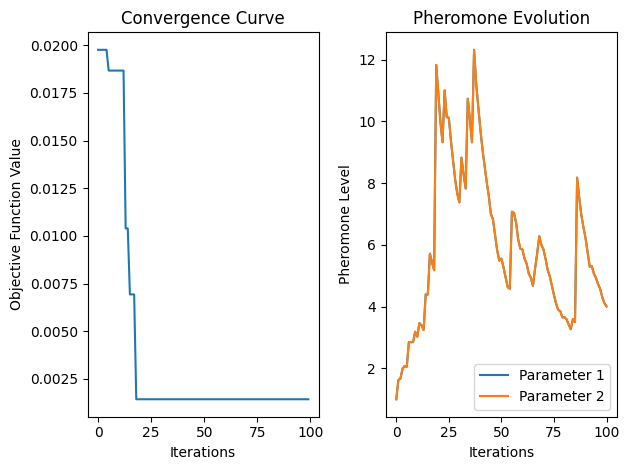

Optimal Solution = [0.00580931 0.03737353]
Optimal Cost = 0.0014305290383181488


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def objective_function(parameters):
    return parameters[0]**2 + parameters[1]**2
def ant_colony_optimization(iterations, num_ants, num_parameters):
    best_solution = None
    best_cost = float('inf')
    convergence_curve = []
    pheromones = np.ones((num_ants, num_parameters))
    pheromone_history = np.zeros((iterations + 1, num_parameters))
    pheromone_history[0, :] = np.mean(pheromones, axis=0)
    for iteration in range(iterations):
        solutions = np.random.rand(num_ants, num_parameters)
        costs = np.apply_along_axis(objective_function, 1, solutions)
        pheromones = pheromones * 0.9 + 0.1 / (costs.reshape(-1, 1) + 1e-5)
        pheromone_history[iteration + 1, :] = np.mean(pheromones, axis=0)
        best_ant = np.argmin(costs)
        if costs[best_ant] < best_cost:
            best_cost = costs[best_ant]
            best_solution = solutions[best_ant]
        convergence_curve.append(best_cost)
    return best_solution, best_cost, convergence_curve, pheromone_history
iterations = 100
num_ants = 10
num_parameters = 2
best_solution, best_cost, convergence_curve, pheromone_history = ant_colony_optimization(iterations, num_ants, num_parameters)
plt.subplot(1, 2, 1)
plt.plot(convergence_curve)
plt.xlabel('Iterations')
plt.ylabel('Objective Function Value')
plt.title('Convergence Curve')
plt.subplot(1, 2, 2)
for i in range(num_parameters):
    plt.plot(pheromone_history[:, i], label=f'Parameter {i+1}')
plt.xlabel('Iterations')
plt.ylabel('Pheromone Level')
plt.title('Pheromone Evolution')
plt.legend()
plt.tight_layout()
plt.show()
print(f"Optimal Solution = {best_solution}")
print(f"Optimal Cost = {best_cost}")

**`Reversible Circuit Synthesis `**

In [ ]:
import random
import math
NUM_ANTS = 10
NUM_ITERATIONS = 100
ALPHA = 1.0
BETA = 2.0
RHO = 0.5
Q = 100
Q0 = 0.9
NUM_NODES = 6
class Node:
    def __init__(self, value):
        self.value = value
class Edge:
    def __init__(self, source, destination, graph):
        self.source = source
        self.destination = destination
        self.pheromone = 1.0
        node_value_difference = abs(graph.nodes[source].value - graph.nodes[destination].value)
        self.heuristic = 1.0 / node_value_difference if node_value_difference != 0 else float('inf')
class Graph:
    def __init__(self):
        self.num_nodes = NUM_NODES
        self.num_edges = NUM_NODES * (NUM_NODES - 1) // 2
        self.nodes = [Node(random.randint(0, 99)) for _ in range(self.num_nodes)]
        self.edges = [Edge(i, j, self) for i in range(self.num_nodes - 1) for j in range(i + 1, self.num_nodes)]
class Ant:
    def __init__(self):
        self.tour = []
        self.tour_length = 0.0
def initialize_pheromones(graph):
    for edge in graph.edges:
        edge.pheromone = 1.0
def generate_random_tour(graph, ant):
    ant.tour_length = 0
    ant.tour = list(range(graph.num_nodes))
    for i in range(graph.num_nodes - 1, 0, -1):
        j = random.randint(0, i)
        ant.tour[i], ant.tour[j] = ant.tour[j], ant.tour[i]
def calculate_tour_length(graph, ant):
    tour_length = 0.0
    for i in range(graph.num_nodes - 1):
        source = ant.tour[i]
        destination = ant.tour[i + 1]
        tour_length += abs(graph.nodes[source].value - graph.nodes[destination].value)
    last_node = ant.tour[graph.num_nodes - 1]
    tour_length += abs(graph.nodes[last_node].value - graph.nodes[ant.tour[0]].value)
    return tour_length
def contains_node(tour, node):
    return node in tour
def update_pheromones(graph, delta_pheromones):
    for i in range(graph.num_edges):
        for j in range(NUM_ANTS):
            graph.edges[i].pheromone *= (1 - RHO)
            graph.edges[i].pheromone += delta_pheromones[i].pheromone
def choose_next_node(graph, ant, pheromones, heuristics, exploration_prob):
    current = ant.tour[-1]
    probabilities = [0.0] * graph.num_nodes
    total_probability = 0.0
    for i in range(graph.num_nodes):
        if not contains_node(ant.tour, i):
            probabilities[i] = (
                math.pow(pheromones[current][i].pheromone, ALPHA) *
                math.pow(heuristics[current][i].heuristic, BETA)
            )
            total_probability += probabilities[i]
        else:
            probabilities[i] = 0.0
    if random.random() < exploration_prob:
        random_value = random.random() * total_probability
        cumulative_probability = 0.0
        for i in range(graph.num_nodes):
            if cumulative_probability + probabilities[i] >= random_value:
                return i
            cumulative_probability += probabilities[i]
    else:
        max_probability = -1.0
        next_node = -1
        for i in range(graph.num_nodes):
            if probabilities[i] > max_probability:
                max_probability = probabilities[i]
                next_node = i
        return next_node
    return -1
def ant_colony_optimization(graph):
    delta_pheromones = [Edge(0, 0, graph) for _ in range(graph.num_edges)]
    ants = [Ant() for _ in range(NUM_ANTS)]
    for iteration in range(NUM_ITERATIONS):
        for ant_index in range(NUM_ANTS):
            generate_random_tour(graph, ants[ant_index])
            while ants[ant_index].tour_length < graph.num_nodes:
                next_node = choose_next_node(
                    graph, ants[ant_index], graph.edges, graph.edges, Q0
                )
                ants[ant_index].tour.append(next_node)
                ants[ant_index].tour_length += 1
        best_tour_length = float('inf')
        best_ant_index = -1
        for ant_index in range(NUM_ANTS):
            ants[ant_index].tour_length = calculate_tour_length(
                graph, ants[ant_index]
            )
            if ants[ant_index].tour_length < best_tour_length:
                best_tour_length = ants[ant_index].tour_length
                best_ant_index = ant_index
        print(f"Iteration-{iteration + 1}: Best Tour Length = {best_tour_length}")
        for i in range(graph.num_edges):
            delta_pheromones[i].pheromone = Q / ants[best_ant_index].tour_length
        update_pheromones(graph, delta_pheromones)
if __name__ == "__main__":
    random.seed()
    graph = Graph()
    initialize_pheromones(graph)
    ant_colony_optimization(graph)

Iteration-1: Best Tour Length = 178.0
Iteration-2: Best Tour Length = 166.0
Iteration-3: Best Tour Length = 192.0
Iteration-4: Best Tour Length = 166.0
Iteration-5: Best Tour Length = 166.0
Iteration-6: Best Tour Length = 166.0
Iteration-7: Best Tour Length = 178.0
Iteration-8: Best Tour Length = 166.0
Iteration-9: Best Tour Length = 166.0
Iteration-10: Best Tour Length = 166.0
Iteration-11: Best Tour Length = 166.0
Iteration-12: Best Tour Length = 166.0
Iteration-13: Best Tour Length = 166.0
Iteration-14: Best Tour Length = 166.0
Iteration-15: Best Tour Length = 204.0
Iteration-16: Best Tour Length = 166.0
Iteration-17: Best Tour Length = 166.0
Iteration-18: Best Tour Length = 192.0
Iteration-19: Best Tour Length = 166.0
Iteration-20: Best Tour Length = 166.0
Iteration-21: Best Tour Length = 166.0
Iteration-22: Best Tour Length = 166.0
Iteration-23: Best Tour Length = 204.0
Iteration-24: Best Tour Length = 166.0
Iteration-25: Best Tour Length = 166.0
Iteration-26: Best Tour Length = 1

In [ ]:
import numpy as np
def generate_initial_circuit(num_ants, num_gates, num_connections):
    circuits = []
    for _ in range(num_ants):
        circuit = np.random.randint(2, size=(num_gates, num_connections))
        circuits.append(circuit)
    return circuits
def evaluate_fitness(circuit):
    return np.sum(circuit)
def local_search(circuit):
    row_to_flip = np.random.randint(circuit.shape[0])
    circuit[row_to_flip] = 1 - circuit[row_to_flip]
    return circuit
def ant_colony_optimization(n_ants, n_iterations, rho, tau0, alpha, beta, Q, num_gates, num_connections):
    pheromones = np.full((num_gates, num_connections), tau0)
    best_circuit = None
    best_fitness = float('-inf')
    for iteration in range(n_iterations):
        ants = generate_initial_circuit(n_ants, num_gates, num_connections)
        for ant in ants:
            probabilities = pheromones ** alpha * (1 / (evaluate_fitness(ant) + 1)) ** beta
            probabilities /= probabilities.sum(axis=1)[:, np.newaxis]
            for i in range(num_gates):
                chosen_connection = np.random.choice(num_connections, p=probabilities[i])
                ant[i, :] = 0
                ant[i, chosen_connection] = 1
            ant = local_search(ant)
            fitness = evaluate_fitness(ant)
            delta_tau = Q / fitness
            pheromones = (1 - rho) * pheromones + delta_tau
        for ant in ants:
            ant_fitness = evaluate_fitness(ant)
            if ant_fitness > best_fitness:
                best_circuit = ant.copy()
                best_fitness = ant_fitness
        pheromones = (1 - rho) * pheromones
        delta_tau_best = Q / best_fitness
        pheromones = pheromones + delta_tau_best
    return best_circuit
n_ants = 10
n_iterations = 100
rho = 0.1
tau0 = 1.0
alpha = 1.0
beta = 2.0
Q = 1.0
num_gates = 5
num_connections = 10
best_solution = ant_colony_optimization(n_ants, n_iterations, rho, tau0, alpha, beta, Q, num_gates, num_connections)
print("Best Circuit =")
print(best_solution)

Best Circuit =
[[1 1 1 1 1 1 0 1 1 1]
 [0 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]]


In [ ]:
import numpy as np
def generate_initial_circuit(num_ants, num_gates, num_connections):
    circuits = []
    for _ in range(num_ants):
        circuit = np.random.randint(2, size=(num_gates, num_connections))
        circuits.append(circuit)
    return circuits
def evaluate_fitness(circuit):
    return np.sum(circuit)
def local_search(circuit):
    row_to_flip = np.random.randint(circuit.shape[0])
    circuit[row_to_flip] = 1 - circuit[row_to_flip]
    return circuit
def ant_colony_optimization(n_ants, n_iterations, rho, tau0, alpha, beta, Q, num_gates, max_connections):
    pheromones = np.full((num_gates, max_connections), tau0)
    best_circuit = None
    best_fitness = float('-inf')
    for iteration in range(n_iterations):
        ants = generate_initial_circuit(n_ants, num_gates, max_connections)
        for ant in ants:
            probabilities = pheromones ** alpha * (1 / (evaluate_fitness(ant) + 1)) ** beta
            probabilities /= probabilities.sum(axis=1)[:, np.newaxis]
            for i in range(num_gates):
                chosen_connection = np.random.choice(max_connections, p=probabilities[i])
                ant[i, :] = 0
                ant[i, chosen_connection] = 1
            ant = local_search(ant)
            fitness = evaluate_fitness(ant)
            delta_tau = Q / fitness
            pheromones = (1 - rho) * pheromones + delta_tau
            unused_connections = np.where(np.sum(ant, axis=0) == 0)[0]
            pheromones[:, unused_connections] += 0.1
        for ant in ants:
            ant_fitness = evaluate_fitness(ant)
            if ant_fitness > best_fitness:
                best_circuit = ant.copy()
                best_fitness = ant_fitness
        pheromones = (1 - rho) * pheromones
        delta_tau_best = Q / best_fitness
        pheromones = pheromones + delta_tau_best
    return best_circuit
n_ants = 10
n_iterations = 100
rho = 0.1
tau0 = 1.0
alpha = 1.0
beta = 2.0
Q = 1.0
num_gates = 5
max_connections = 10
best_solution = ant_colony_optimization(n_ants, n_iterations, rho, tau0, alpha, beta, Q, num_gates, max_connections)
print("Best Circuit =")
print(best_solution)

Best Circuit =
[[1 1 1 1 1 0 1 1 1 1]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1]]


Reversible Circuit =
[[1]
 [0]
 [0]
 [1]]


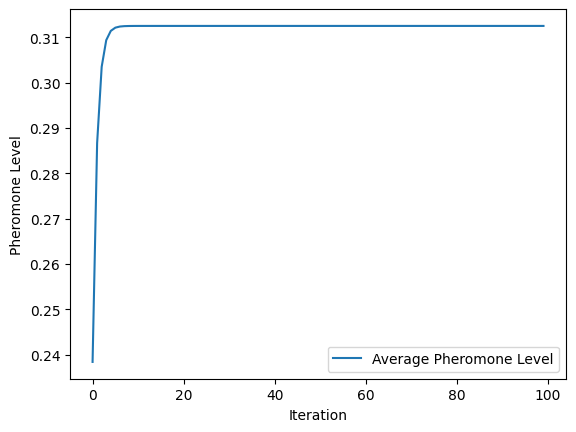

Initial Energy Consumption = 12
Optimized Energy Consumption = 2
Efficiency Improvement = 83.33333333333334 %


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
MAX_ITERATIONS = 100
NUM_ANTS = 10
PHEROMONE_INITIAL = 0.1
ALPHA = 1.0
BETA = 1.0
Q = 1.0
EVAPORATION_RATE = 0.1
def initialize_graph(num_qubits):
    return np.zeros((num_qubits, num_qubits), dtype=int)
def initialize_pheromones(graph, initial_pheromone):
    return np.full_like(graph, initial_pheromone, dtype=float)
def construct_solution(graph, pheromones, alpha, beta):
    num_qubits = graph.shape[0]
    solution = []
    current_qubit = 0
    while current_qubit < num_qubits - 1:
        next_qubit = choose_next_qubit(graph, pheromones, current_qubit, alpha, beta)
        solution.append((current_qubit, next_qubit))
        current_qubit = next_qubit
    return solution
def choose_next_qubit(graph, pheromones, current_qubit, alpha, beta):
    probabilities = calculate_probabilities(graph, pheromones, current_qubit, alpha, beta)
    return np.random.choice(np.arange(len(probabilities)), p=probabilities)
def calculate_probabilities(graph, pheromones, current_qubit, alpha, beta):
    edge_weights = graph[current_qubit]
    pheromone_weights = pheromones[current_qubit]
    probabilities = (pheromone_weights ** alpha) * (edge_weights ** beta)
    if np.sum(probabilities) == 0:
        return np.ones_like(probabilities) / len(probabilities)
    else:
        probabilities /= np.sum(probabilities)
        return probabilities
def calculate_quantum_cost(solution):
    num_toffoli_gates = sum([1 for gate in solution if gate[1] != gate[0] + 1])
    num_cnot_gates = len(solution) - num_toffoli_gates
    quantum_cost = num_toffoli_gates + 2 * num_cnot_gates
    return quantum_cost
def calculate_garbage_outputs(solution):
    return len([gate for gate in solution if gate[1] != gate[0] + 1])
def update_pheromones(pheromones, solution, energy_consumption, Q):
    evaporation = EVAPORATION_RATE
    pheromones *= (1 - evaporation)
    for gate in solution:
        pheromones[gate] += Q / energy_consumption
def visualize_circuit(solution, num_qubits):
    circuit_matrix = np.zeros((num_qubits, len(solution)), dtype=int)
    for i, (control, target) in enumerate(solution):
        circuit_matrix[control, i] = 1
        circuit_matrix[target, i] = 1
    print("Reversible Circuit =")
    print(circuit_matrix)
num_qubits = 4
graph = initialize_graph(num_qubits)
pheromones = initialize_pheromones(graph, PHEROMONE_INITIAL)
best_solution = None
best_energy_consumption = float('inf')
pheromone_history = np.zeros((MAX_ITERATIONS, num_qubits, num_qubits))
for iteration in range(MAX_ITERATIONS):
    ant_solutions = []
    for ant in range(NUM_ANTS):
        solution = construct_solution(graph, pheromones, ALPHA, BETA)
        ant_solutions.append(solution)
    for ant_solution in ant_solutions:
        qc = calculate_quantum_cost(ant_solution)
        garbage_outputs = calculate_garbage_outputs(ant_solution)
        energy_consumption = qc + garbage_outputs
        update_pheromones(pheromones, ant_solution, energy_consumption, Q)
        if energy_consumption < best_energy_consumption:
            best_solution = ant_solution
            best_energy_consumption = energy_consumption
    pheromone_history[iteration] = pheromones.copy()
visualize_circuit(best_solution, num_qubits)
def plot_pheromone_evolution(pheromone_history):
    iterations = range(len(pheromone_history))
    pheromone_mean = np.mean(pheromone_history, axis=(1, 2))
    plt.plot(iterations, pheromone_mean, label='Average Pheromone Level')
    plt.xlabel('Iteration')
    plt.ylabel('Pheromone Level')
    plt.legend()
    plt.show()
plot_pheromone_evolution(pheromone_history)
initial_solution = construct_solution(graph, pheromones, ALPHA, BETA)
initial_qc = calculate_quantum_cost(initial_solution)
initial_garbage_outputs = calculate_garbage_outputs(initial_solution)
initial_energy_consumption = initial_qc + initial_garbage_outputs
print("Initial Energy Consumption =", initial_energy_consumption)
print("Optimized Energy Consumption =", best_energy_consumption)
print("Efficiency Improvement =", (initial_energy_consumption - best_energy_consumption) / initial_energy_consumption * 100, "%")

In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 33 not upgraded.
Need to get 2,433 kB of archives.
After this operation, 7,694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2 [2,037 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgail18 amd64 2.24.33-2ubuntu2 [15.9 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64

Reversible Circuit =
[[1]
 [0]
 [0]
 [1]]
Initial Energy Consumption = 14
Optimized Energy Consumption = 2
Efficiency Improvement = 85.71428571428571 %


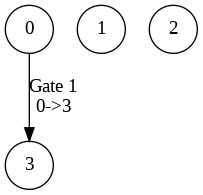

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pygraphviz as pgv
import os
from IPython.display import Image
MAX_ITERATIONS = 100
NUM_ANTS = 10
PHEROMONE_INITIAL = 0.1
ALPHA = 1.0
BETA = 1.0
Q = 1.0
EVAPORATION_RATE = 0.1
def initialize_graph(num_qubits):
    return np.zeros((num_qubits, num_qubits), dtype=int)
def initialize_pheromones(graph, initial_pheromone):
    return np.full_like(graph, initial_pheromone, dtype=float)
def construct_solution(graph, pheromones, alpha, beta):
    num_qubits = graph.shape[0]
    solution = []
    current_qubit = 0
    while current_qubit < num_qubits - 1:
        next_qubit = choose_next_qubit(graph, pheromones, current_qubit, alpha, beta)
        solution.append((current_qubit, next_qubit))
        current_qubit = next_qubit
    return solution
def choose_next_qubit(graph, pheromones, current_qubit, alpha, beta):
    probabilities = calculate_probabilities(graph, pheromones, current_qubit, alpha, beta)
    return np.random.choice(np.arange(len(probabilities)), p=probabilities)
def calculate_probabilities(graph, pheromones, current_qubit, alpha, beta):
    edge_weights = graph[current_qubit]
    pheromone_weights = pheromones[current_qubit]
    probabilities = (pheromone_weights ** alpha) * (edge_weights ** beta)
    if np.sum(probabilities) == 0:
        return np.ones_like(probabilities) / len(probabilities)
    else:
        probabilities /= np.sum(probabilities)
        return probabilities
def calculate_quantum_cost(solution):
    num_toffoli_gates = sum([1 for gate in solution if gate[1] != gate[0] + 1])
    num_cnot_gates = len(solution) - num_toffoli_gates
    quantum_cost = num_toffoli_gates + 2 * num_cnot_gates
    return quantum_cost
def calculate_garbage_outputs(solution):
    return len([gate for gate in solution if gate[1] != gate[0] + 1])
def update_pheromones(pheromones, solution, energy_consumption, Q):
    evaporation = EVAPORATION_RATE
    pheromones *= (1 - evaporation)
    for gate in solution:
        pheromones[gate] += Q / energy_consumption
def visualize_circuit(solution, num_qubits):
    circuit_matrix = np.zeros((num_qubits, len(solution)), dtype=int)
    for i, (control, target) in enumerate(solution):
        circuit_matrix[control, i] = 1
        circuit_matrix[target, i] = 1
    print("Reversible Circuit =")
    print(circuit_matrix)
    graph = pgv.AGraph(directed=True)
    for qubit in range(num_qubits):
        graph.add_node(qubit, shape='circle')
    for i, (control, target) in enumerate(solution):
        graph.add_edge(control, target, label=f'Gate {i + 1}\n{control}->{target}')
    graph_file_path = 'reversible_circuit_graph.png'
    graph.draw(graph_file_path, format='png', prog='dot')
    current_directory = os.getcwd()
    image_path = os.path.join(current_directory, 'reversible_circuit_graph.png')
    Image(filename=image_path)
num_qubits = 4
graph = initialize_graph(num_qubits)
pheromones = initialize_pheromones(graph, PHEROMONE_INITIAL)
best_solution = None
best_energy_consumption = float('inf')
pheromone_history = np.zeros((MAX_ITERATIONS, num_qubits, num_qubits))
for iteration in range(MAX_ITERATIONS):
    ant_solutions = []
    for ant in range(NUM_ANTS):
        solution = construct_solution(graph, pheromones, ALPHA, BETA)
        ant_solutions.append(solution)
    for ant_solution in ant_solutions:
        qc = calculate_quantum_cost(ant_solution)
        garbage_outputs = calculate_garbage_outputs(ant_solution)
        energy_consumption = qc + garbage_outputs
        update_pheromones(pheromones, ant_solution, energy_consumption, Q)
        if energy_consumption < best_energy_consumption:
            best_solution = ant_solution
            best_energy_consumption = energy_consumption
    pheromone_history[iteration] = pheromones.copy()
visualize_circuit(best_solution, num_qubits)
def plot_pheromone_evolution(pheromone_history):
    iterations = range(len(pheromone_history))
    pheromone_mean = np.mean(pheromone_history, axis=(1, 2))
plot_pheromone_evolution(pheromone_history)
initial_solution = construct_solution(graph, pheromones, ALPHA, BETA)
initial_qc = calculate_quantum_cost(initial_solution)
initial_garbage_outputs = calculate_garbage_outputs(initial_solution)
initial_energy_consumption = initial_qc + initial_garbage_outputs
print("Initial Energy Consumption =", initial_energy_consumption)
print("Optimized Energy Consumption =", best_energy_consumption)
print("Efficiency Improvement =", (initial_energy_consumption - best_energy_consumption) / initial_energy_consumption * 100, "%")
current_directory = os.getcwd()
image_path = os.path.join(current_directory, 'reversible_circuit_graph.png')
Image(filename=image_path)

**`Antenna Optimization`**

In [ ]:
import numpy as np
num_ants = 10
num_iterations = 100
pheromone_decay = 0.5
alpha = 1.0
beta = 2.0
grid_size = 10
antenna_positions = np.random.rand(num_ants, 2) * grid_size
pheromones = np.ones((grid_size, grid_size))
loopback_vibrator = np.array([5, 5])
unloopback_vibrator = np.array([8, 8])
def calculate_heuristic(position):
    distances = np.linalg.norm(antenna_positions - position[:, np.newaxis, :], axis=2)
    return 1.0 / (distances + 1e-6)
for iteration in range(num_iterations):
    print(f"\nIteration {iteration + 1}:")
    for ant in range(num_ants):
        current_position = antenna_positions[ant]
        print(f"\nAnt {ant + 1} at Position: {current_position}")
        heuristic = calculate_heuristic(antenna_positions)
        pheromone = pheromones.flatten()
        probabilities = (pheromone.reshape((grid_size, grid_size)) ** alpha) * (heuristic ** beta)
        current_positions_indices = np.ravel_multi_index(current_position.astype(int).T, (grid_size, grid_size))
        probabilities.ravel()[current_positions_indices] = 0
        selected_index = np.argmax(probabilities)
        selected_position = np.unravel_index(selected_index, (grid_size, grid_size))
        print(f"Selected Next Position: {selected_position}")
        pheromones[selected_position] *= (1 - pheromone_decay)
        antenna_positions[ant] = selected_position
    print("\nPheromone Matrix:")
    print(pheromones)
print("\nFinal Optimized Antenna Positions:")
print(antenna_positions)

Streaming output truncated to the last 5000 lines.
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 5.00000000e-01
  9.53674316e-07 5.00000000e-01]
 [5.00000000e-01 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 9.53674316e-07]]

Iteration 23:

Ant 1 at Position: [2. 2.]
Selected Next Position: (1, 1)

Ant 2 at Position: [3. 3.]
Selected Next Position: (2, 2)

Ant 3 at Position: [4. 4.]
Selected Next Position: (3, 3)

Ant 4 at Position: [5. 5.]
Selected Next Position: (4, 4)

Ant 5 at Position: [6. 6.]
Selected Next Position: (5, 5)

Ant 6 at Position: [7. 7.]
Selected Next Position: (6, 6)

Ant 7 at Position: [8. 8.]
Selected Next Position: (7, 7)

Ant 8 at Position: [0. 0.]
Selected Next Position: (8, 8)

Ant 9 at Position: [8. 7.]
Selected Next Position: (9, 9)

Ant 10 at Position: [9. 9.]
Selected Next Position: (9, 8)

Pheromone Matrix:
[[4.76837

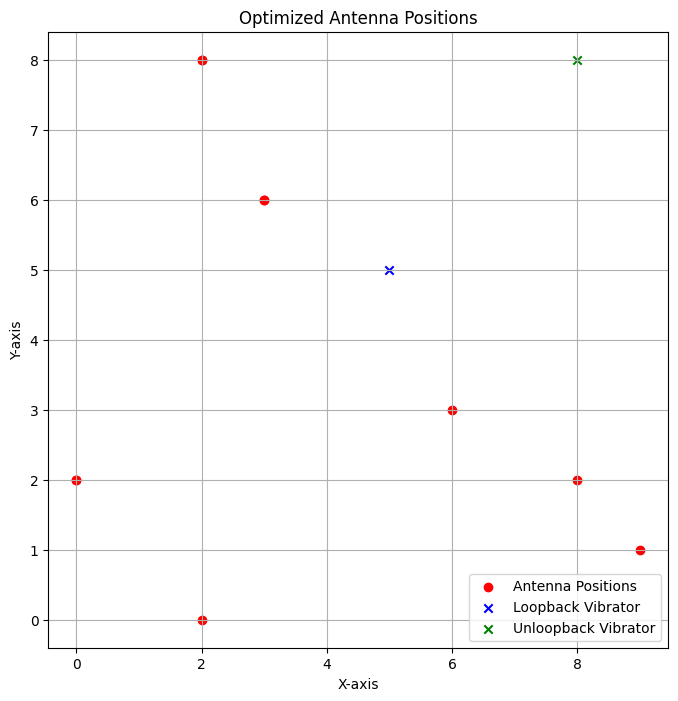

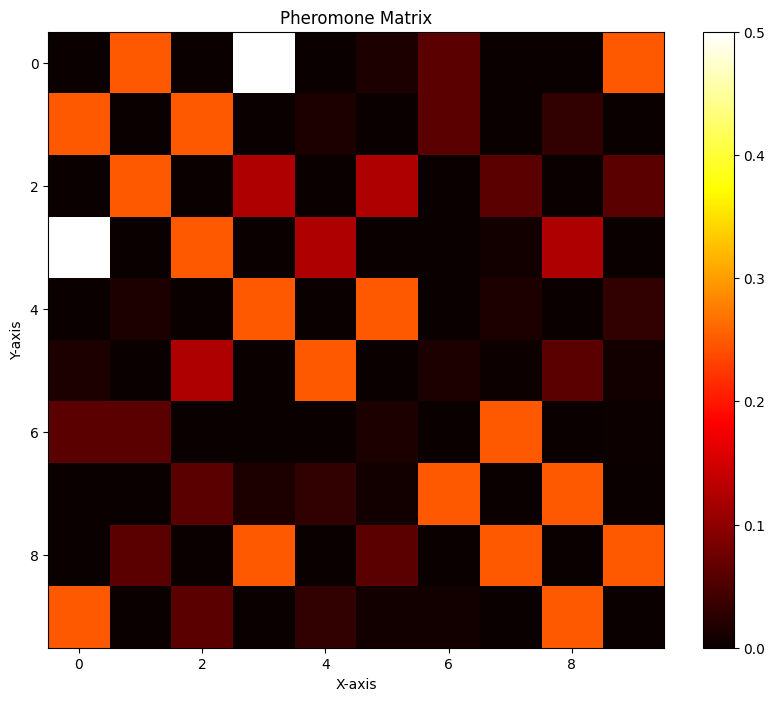

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.scatter(antenna_positions[:, 0], antenna_positions[:, 1], c='red', marker='o', label='Antenna Positions')
plt.scatter(loopback_vibrator[0], loopback_vibrator[1], c='blue', marker='x', label='Loopback Vibrator')
plt.scatter(unloopback_vibrator[0], unloopback_vibrator[1], c='green', marker='x', label='Unloopback Vibrator')
plt.title('Optimized Antenna Positions')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 8))
plt.imshow(pheromones, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Pheromone Matrix')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

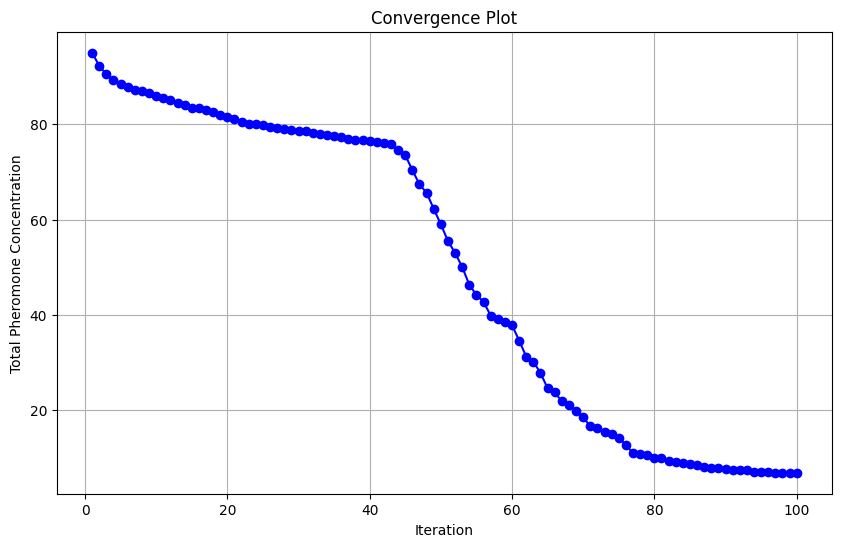

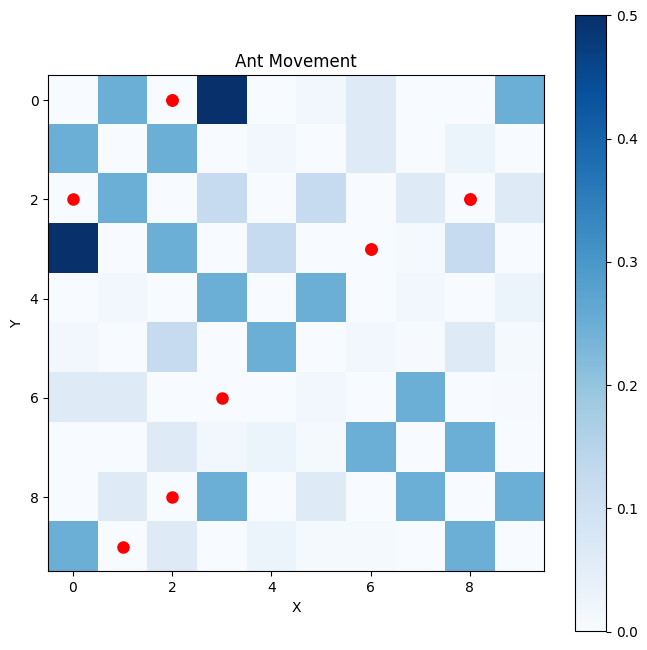

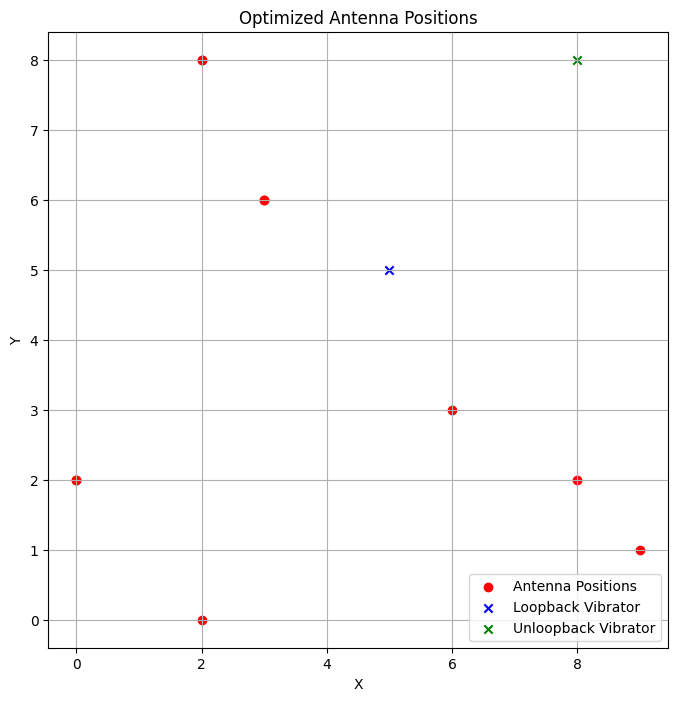

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
num_ants = 10
num_iterations = 100
pheromone_decay = 0.5
alpha = 1.0
beta = 2.0
grid_size = 10
antenna_positions = np.random.rand(num_ants, 2) * grid_size
pheromones = np.ones((grid_size, grid_size))
loopback_vibrator = np.array([5, 5])
unloopback_vibrator = np.array([8, 8])
def calculate_heuristic(position):
    distances = np.linalg.norm(antenna_positions - position[:, np.newaxis, :], axis=2)
    return 1.0 / (distances + 1e-6)
convergence_data = []
for iteration in range(num_iterations):
    for ant in range(num_ants):
        current_position = antenna_positions[ant]
        heuristic = calculate_heuristic(antenna_positions)
        pheromone = pheromones.flatten()
        probabilities = (pheromone.reshape((grid_size, grid_size)) ** alpha) * (heuristic ** beta)
        current_positions_indices = np.ravel_multi_index(current_position.astype(int).T, (grid_size, grid_size))
        probabilities.ravel()[current_positions_indices] = 0
        selected_index = np.argmax(probabilities)
        selected_position = np.unravel_index(selected_index, (grid_size, grid_size))
        pheromones[selected_position] *= (1 - pheromone_decay)
        antenna_positions[ant] = selected_position
    total_pheromone = np.sum(pheromones)
    convergence_data.append(total_pheromone)
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_iterations + 1), convergence_data, marker='o', linestyle='-', color='b')
plt.title('Convergence Plot')
plt.xlabel('Iteration')
plt.ylabel('Total Pheromone Concentration')
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 8))
plt.imshow(pheromones, cmap='Blues', interpolation='nearest')
for ant in range(num_ants):
    plt.plot(antenna_positions[ant, 1], antenna_positions[ant, 0], marker='o', markersize=8, color='red')
plt.title('Ant Movement')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.show()
plt.figure(figsize=(8, 8))
plt.scatter(antenna_positions[:, 0], antenna_positions[:, 1], c='red', marker='o', label='Antenna Positions')
plt.scatter(loopback_vibrator[0], loopback_vibrator[1], c='blue', marker='x', label='Loopback Vibrator')
plt.scatter(unloopback_vibrator[0], unloopback_vibrator[1], c='green', marker='x', label='Unloopback Vibrator')
plt.title('Optimized Antenna Positions')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()